In [1]:
from azureml.core import Workspace, Dataset

# Connect to your Azure ML Workspace
ws = Workspace.from_config()  # Assumes config.json is in the notebook directory
print(f"Workspace loaded: {ws.name}")


Workspace loaded: shushilml


In [281]:
%pip uninstall fix-yahoo-finance pandas-datareader pydotplus
%pip install yfinance
%pip install pandas-datareader
%pip uninstall xgboost
%pip install xgboost --upgrade
%pip install pydotplus
import yfinance as yf  # Replace fix_yahoo_finance
import pandas_datareader as pdr

Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Would remove:
    /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas_datareader-0.10.0.dist-info/*
    /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas_datareader/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 82.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 81.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [67]:
# Method for FileDataset
from azureml.core import Workspace, Dataset
import pandas as pd

# Initialize workspace
workspace = Workspace(
    subscription_id='96449f76-0cf2-4d2b-930d-b0d3643bc215',
    resource_group='shushilresourcegrp', 
    workspace_name='shushilml'
)

# Get the dataset
dataset = Dataset.get_by_name(workspace, name='spotifymodeldata')

# Download the files first
dataset.download(target_path='.', overwrite=False)

# Read the CSV file into a dataframe

{'infer_column_types': 'False', 'activity': 'download.to_path'}
{'infer_column_types': 'False', 'activity': 'download.to_path', 'activityApp': 'FileDataset'}
{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/chettavignesh2/code/Users/chettavignesh/trainingdata']

In [42]:
import seaborn as sns

sns.set_style('white')  # Instead of seaborn-white
sns.set_context('paper')
plt.rcParams["figure.figsize"] = (24,8)

In [68]:
import pandas as pd
%pip install seaborn matplotlib bs4 spotipy pandas scikit-learn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup as soup
import requests
# Read CSV file into DataFrame
df = pd.read_csv('./trainingdata')

Note: you may need to restart the kernel to use updated packages.


In [73]:
df.head(5)

,date,title,artist,url,streams,track_id,region
0,2018-11-02,infatuation,takeoff,https://open.spotify.com/track/00I0pcNkN3IOX3f...,255665,00I0pcNkN3IOX3fsYbaB4N,united states
1,2017-03-24,still got time,zayn,https://open.spotify.com/track/000xQL6tZNLJzIr...,10926,000xQL6tZNLJzIrtIgxqSl,malaysia
2,2021-04-23,lance individual,jorge & mateus,https://open.spotify.com/track/000RW47rhEkSqjg...,548706,000RW47rhEkSqjgTrZx7YX,brazil
3,2018-04-13,mój ruch,syny,https://open.spotify.com/track/00cFv8E9VSMpsH9...,67634,00cFv8E9VSMpsH9Ue71KvN,poland
4,2019-05-06,little flower,kana adachi,https://open.spotify.com/track/008jrQKCdBGzQdx...,120640,008jrQKCdBGzQdxp9Fk40z,japan


In [71]:
df.dtypes

date        object
title       object
artist      object
url         object
streams      int64
track_id    object
region      object
dtype: object

In [72]:
df['date']=pd.to_datetime(df['date']).dt.date

In [74]:
df.set_index('date',inplace=True)
df.head()

,title,artist,url,streams,track_id,region
date,,,,,,
2018-11-02,infatuation,takeoff,https://open.spotify.com/track/00I0pcNkN3IOX3f...,255665,00I0pcNkN3IOX3fsYbaB4N,united states
2017-03-24,still got time,zayn,https://open.spotify.com/track/000xQL6tZNLJzIr...,10926,000xQL6tZNLJzIrtIgxqSl,malaysia
2021-04-23,lance individual,jorge & mateus,https://open.spotify.com/track/000RW47rhEkSqjg...,548706,000RW47rhEkSqjgTrZx7YX,brazil
2018-04-13,mój ruch,syny,https://open.spotify.com/track/00cFv8E9VSMpsH9...,67634,00cFv8E9VSMpsH9Ue71KvN,poland
2019-05-06,little flower,kana adachi,https://open.spotify.com/track/008jrQKCdBGzQdx...,120640,008jrQKCdBGzQdxp9Fk40z,japan


In [87]:
df.shape

(217558, 6)

In [102]:
df.drop_duplicates(subset=['title'],inplace=True)

In [103]:
df[df['title']=="white christmas"]

,title,artist,url,streams,track_id,region
date,,,,,,
2017-11-25,white christmas,bill pinkney,https://open.spotify.com/track/0iyrGs4yXc2lWQC...,67634,0iyrGs4yXc2lWQCqCgCx0C,austria


In [100]:
url_l=[x for x in df[df['title']=="white christmas"]['url']]
url_l

['https://open.spotify.com/track/0iyrGs4yXc2lWQCqCgCx0C',
 'https://open.spotify.com/track/0Xi9LfrVI0yu0WS3P0mXUE',
 'https://open.spotify.com/track/16GhQObA6sk3hiJfX99pH6',
 'https://open.spotify.com/track/2a90ygVM4bOjZR0lTuWBR7',
 'https://open.spotify.com/track/2gbCG4Rt9984UZ7Tc0dIFd',
 'https://open.spotify.com/track/370oYn3s5EKu7ziUpMQQTr',
 'https://open.spotify.com/track/3f1afnyDfTl51kgyqNPHMv',
 'https://open.spotify.com/track/3ia1LZNjVM8pbAMNj4f5lM',
 'https://open.spotify.com/track/3U2onubxT4vYkm6M8b5gSP',
 'https://open.spotify.com/track/3UtAj8EP7DvesfEMQULP79',
 'https://open.spotify.com/track/4buHBCFNm5WvttEDevaj9C',
 'https://open.spotify.com/track/4so0Wek9Ig1p6CRCHuINwW',
 'https://open.spotify.com/track/4Z6vxJ173RADJEdgEF6ns7',
 'https://open.spotify.com/track/4UI0J1JqYBqVeSXgdIJo0x',
 'https://open.spotify.com/track/55U1UHQ4lQHZVcN0C5TTZb',
 'https://open.spotify.com/track/5NAzGjb7RM9oQZLB10CjvI',
 'https://open.spotify.com/track/5WEFnS38UuTJzEPsGiYGMS',
 'https://open

In [41]:
df.drop_duplicates(subset=['track_id'],keep='first',inplace=True)

In [105]:
df.shape

(151818, 6)

In [286]:
df.corr(numeric_only=True)

,streams
streams,1.0


In [47]:
track_df = df['track_id'].to_frame()

In [48]:
track_df.shape

(217, 1)

In [271]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
# Spotify API credentials
Client_ID="87e4108899ed430da656441707d78ba5"
Client_secret="6119978fb96e45f1979712e19b3ad9bd"

# Authenticate with Spotify API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=Client_ID, client_secret=Client_secret))

In [272]:
import base64
import requests

def get_access_token(Client_ID, Client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    # Encode the Client ID and Client Secret
    auth_str = f'{Client_ID}:{Client_secret}'
    b64_auth_str = base64.b64encode(auth_str.encode()).decode()
    headers = {
        'Authorization': f'Basic {b64_auth_str}',
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    data = {
        'grant_type': 'client_credentials'
    }
    response = requests.post(auth_url, headers=headers, data=data)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(f"Failed to obtain access token: {response_data.get('error_description', '')}")
    return response_data['access_token']

# Get the access token
access_token = get_access_token(Client_ID, Client_secret)


In [91]:
def get_track_features(track_id, access_token):
    headers = {
        'Authorization': f'Bearer {access_token}',
    }
    response = requests.get(f'https://api.spotify.com/v1/artists/{track_id}', headers=headers)
    return response.json()

track_features = get_track_features(track_df['track_id'][5],access_token)

In [92]:
track_features

{'error': {'status': 404, 'message': 'Resource not found'}}

In [273]:
def extract_audio_features(track_id, access_token):
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(f'https://api.spotify.com/v1/audio-features/{track_id}', 
                          headers=headers)
    return response.json()

def extract_track_info(track_id, access_token):
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(f'https://api.spotify.com/v1/tracks/{track_id}', 
                          headers=headers)
    return response.json()

def extract_artist_info(track_id, access_token):
    headers = {'Authorization': f'Bearer {access_token}'}
    track_data = extract_track_info(track_id, access_token)
    artist_id = track_data['artists'][0]['id']
    response = requests.get(f'https://api.spotify.com/v1/artists/{artist_id}', 
                          headers=headers)
    return response.json()

def combine_info(audio_features, track_info, artist_info):
    return {
        'track_name': track_info['name'],
        'album_name': track_info['album']['name'],
        'artists': artist_info['name'],
        'popularity': track_info['popularity'],
        'duration_ms': audio_features['duration_ms'],
        'danceability': audio_features['danceability'],
        'energy': audio_features['energy'],
        'key': audio_features['key'],
        'loudness': audio_features['loudness'],
        'mode': audio_features['mode'],
        'speechiness': audio_features['speechiness'],
        'acousticness': audio_features['acousticness'],
        'instrumentalness': audio_features['instrumentalness'],
        'liveness': audio_features['liveness'],
        'valence': audio_features['valence'],
        'tempo': audio_features['tempo'],
        'time_signature': audio_features['time_signature'],
        'artist_genres': artist_info['genres']
    }

In [274]:
import time
from tqdm import tqdm  # for progress bar

def get_spotify_data(track_df):
    # Create empty list to store results
    results = []
    
    # Add delay between API calls
    delay = 0.5  # 500ms delay
    
    # Use tqdm for progress bar
    for track_id in tqdm(track_df['track_id']):
        try:
            # Add delay to avoid rate limiting
            time.sleep(delay)
            
            # Get features
            audio_features = extract_audio_features(track_id, access_token)
            if not audio_features:
                print(f"No audio features found for track {track_id}")
                continue
                
            track_info = extract_track_info(track_id, access_token)
            if not track_info or 'artists' not in track_info:
                print(f"No track info found for track {track_id}")
                continue
                
            artist_info = extract_artist_info(track_id, access_token)
            if not artist_info:
                print(f"No artist info found for track {track_id}")
                continue
            
            # Combine all information
            combined_data = combine_info(audio_features, track_info, artist_info)
            combined_data['track_id'] = track_id
            results.append(combined_data)
            
        except Exception as e:
            print(f"Error processing track {track_id}: {str(e)}")
            continue
            
    # Convert to DataFrame
    return pd.DataFrame(results)

# Run the function
spotify_df = get_spotify_data(track_df)

# Merge with original track_df
final_df = track_df.merge(spotify_df, on='track_id', how='inner')

100%|██████████| 217/217 [03:09<00:00,  1.15it/s]


In [275]:
final_df.head()

,track_id,track_name,album_name,artists,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_genres
0,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,Leave The Door Open,Bruno Mars,10,242096,0.586,0.616,5,-7.964,1,0.0324,0.1820,0.000000,0.0927,0.719,148.088,4,"[dance pop, pop]"
1,6755DFiZ7CWe2WMdTGW5C1,Ski,Slime Language 2,Young Stoner Life,63,152333,0.953,0.621,8,-7.638,0,0.2210,0.0170,0.000000,0.0398,0.883,123.016,4,[pop rap]
2,4so0Wek9Ig1p6CRCHuINwW,White Christmas - 1947 Version,Holiday Inn (Original Motion Picture Soundtrack),Bing Crosby,14,177480,0.290,0.159,9,-16.486,1,0.0363,0.6730,0.355000,0.3380,0.252,100.320,4,"[adult standards, easy listening, lounge, swing]"
3,1cA4wEmLkKlttS6N89LbJh,Wandered To LA (with Justin Bieber),Fighting Demons,Juice WRLD,0,188833,0.687,0.643,0,-4.763,1,0.0406,0.0518,0.000003,0.1100,0.418,135.068,4,"[chicago rap, melodic rap, rap]"
4,3Wrjm47oTz2sjIgck11l5e,Beggin',Chosen,Måneskin,82,211560,0.714,0.800,11,-4.808,0,0.0504,0.1270,0.000000,0.3590,0.589,134.002,4,"[indie rock italiano, italian pop]"


In [225]:
final_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,54.124424,209295.580645,0.648364,0.583945,5.105991,-7.106161,0.672811,0.125312,0.270597,0.009287,0.198250,0.449247,120.215336,3.953917
std,28.318104,65300.871169,0.149009,0.160062,3.702203,2.405772,0.470272,0.113416,0.278734,0.060689,0.156459,0.230592,31.181581,0.357066
min,0.000000,88625.000000,0.234000,0.128000,0.000000,-17.261000,0.000000,0.024800,0.000328,0.000000,0.026400,0.032000,65.988000,1.000000
25%,54.000000,170792.000000,0.568000,0.480000,1.000000,-8.370000,0.000000,0.039100,0.037000,0.000000,0.101000,0.268000,93.005000,4.000000
50%,65.000000,200548.000000,0.671000,0.609000,5.000000,-6.682000,1.000000,0.077700,0.169000,0.000000,0.130000,0.419000,119.082000,4.000000
75%,73.000000,231041.000000,0.754000,0.698000,8.000000,-5.484000,1.000000,0.178000,0.440000,0.000004,0.272000,0.620000,141.020000,4.000000
max,88.000000,613027.000000,0.953000,0.899000,11.000000,-2.724000,1.000000,0.564000,0.974000,0.551000,0.914000,0.967000,205.863000,5.000000


In [331]:
# First select the columns from df
subset_df = df[['track_id', 'date', 'streams']]

# Perform the merge
combined_df = pd.merge(
    final_df,
    subset_df,
    on='track_id',
    how='inner'  # Specify merge type
)

In [332]:
combined_df.to_csv("combined_spotifydata.csv", index=False)

In [166]:
import pandas as pd
combined_df = pd.read_csv('combined_spotifydata.csv')
df = pd.read_csv('trainingdata')

In [167]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df.dtypes

track_id                    object
track_name                  object
album_name                  object
artists                     object
popularity                   int64
duration_ms                  int64
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
artist_genres               object
date                datetime64[ns]
streams                      int64
dtype: object

In [168]:
df.head()

,date,title,artist,url,streams,track_id,region
0,2018-11-02 00:00:00.0000000,infatuation,takeoff,https://open.spotify.com/track/00I0pcNkN3IOX3f...,255665,00I0pcNkN3IOX3fsYbaB4N,united states
1,2017-03-24 00:00:00.0000000,still got time,zayn,https://open.spotify.com/track/000xQL6tZNLJzIr...,10926,000xQL6tZNLJzIrtIgxqSl,malaysia
2,2021-04-23 00:00:00.0000000,lance individual,jorge & mateus,https://open.spotify.com/track/000RW47rhEkSqjg...,548706,000RW47rhEkSqjgTrZx7YX,brazil
3,2018-04-13 00:00:00.0000000,mój ruch,syny,https://open.spotify.com/track/00cFv8E9VSMpsH9...,67634,00cFv8E9VSMpsH9Ue71KvN,poland
4,2019-05-06 00:00:00.0000000,little flower,kana adachi,https://open.spotify.com/track/008jrQKCdBGzQdx...,120640,008jrQKCdBGzQdxp9Fk40z,japan


In [169]:
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
df['title'] = df['title'].astype('string')  # Convert to string (optional)
df['artist'] = df['artist'].astype('string')  # Convert to string (optional)
df['url'] = df['url'].astype('string')  # Convert to string (optional)
df['track_id'] = df['track_id'].astype('string')  # Convert to string (optional)
df['region'] = df['region'].astype('category')  # Convert to category (if applicable)


In [170]:
dtypes = {
    'track_id': 'string',
    'track_name': 'string',
    'album_name': 'string',
    'artists': 'string',
    'popularity': 'int16',
    'duration_ms': 'int32',
    'danceability': 'float32',
    'energy': 'float32',
    'key': 'int8',
    'loudness': 'float32',
    'mode': 'int8',
    'speechiness': 'float32',
    'acousticness': 'float32',
    'instrumentalness': 'float32',
    'liveness': 'float32',
    'valence': 'float32',
    'tempo': 'float32',
    'time_signature': 'int8',
    'artist_genres': 'string',
    'date': 'datetime64[ns]',
    'streams': 'int64'
}

# Apply the data types
combined_df = combined_df.astype(dtypes)

In [171]:
combined_df.dtypes

track_id            string[python]
track_name          string[python]
album_name          string[python]
artists             string[python]
popularity                   int16
duration_ms                  int32
danceability               float32
energy                     float32
key                           int8
loudness                   float32
mode                          int8
speechiness                float32
acousticness               float32
instrumentalness           float32
liveness                   float32
valence                    float32
tempo                      float32
time_signature                int8
artist_genres       string[python]
date                datetime64[ns]
streams                      int64
dtype: object

In [172]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          123 non-null    string        
 1   track_name        123 non-null    string        
 2   album_name        123 non-null    string        
 3   artists           123 non-null    string        
 4   popularity        123 non-null    int16         
 5   duration_ms       123 non-null    int32         
 6   danceability      123 non-null    float32       
 7   energy            123 non-null    float32       
 8   key               123 non-null    int8          
 9   loudness          123 non-null    float32       
 10  mode              123 non-null    int8          
 11  speechiness       123 non-null    float32       
 12  acousticness      123 non-null    float32       
 13  instrumentalness  123 non-null    float32       
 14  liveness          123 non-

In [173]:
combined_df.head()

,track_id,track_name,album_name,artists,popularity,duration_ms,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,date,streams
0,6755DFiZ7CWe2WMdTGW5C1,Ski,Slime Language 2,Young Stoner Life,63,152333,0.953,0.621,8,-7.638,...,0.2210,0.0170,0.000000,0.0398,0.883,123.015999,4,['pop rap'],2021-04-16,5541
1,1cA4wEmLkKlttS6N89LbJh,Wandered To LA (with Justin Bieber),Fighting Demons,Juice WRLD,0,188833,0.687,0.643,0,-4.763,...,0.0406,0.0518,0.000003,0.1100,0.418,135.067993,4,"['chicago rap', 'melodic rap', 'rap']",2021-12-10,162177
2,3Wrjm47oTz2sjIgck11l5e,Beggin',Chosen,Måneskin,82,211560,0.714,0.800,11,-4.808,...,0.0504,0.1270,0.000000,0.3590,0.589,134.001999,4,"['indie rock italiano', 'italian pop']",2017-12-15,61486
3,6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),Red (Taylor's Version),Taylor Swift,72,219760,0.584,0.557,6,-6.371,...,0.0342,0.0129,0.000000,0.0576,0.767,154.007996,4,['pop'],2021-11-13,19657
4,0k4d5YPDr1r7FX77VdqWez,You Right,Planet Her,Doja Cat,74,186173,0.828,0.621,8,-6.414,...,0.0565,0.0164,0.002330,0.0845,0.436,128.985992,4,"['dance pop', 'pop']",2021-06-25,29940


In [174]:
combined_df['year']= combined_df.date.dt.year
month_pop=combined_df.groupby(by="year").mean(numeric_only=True).reset_index()

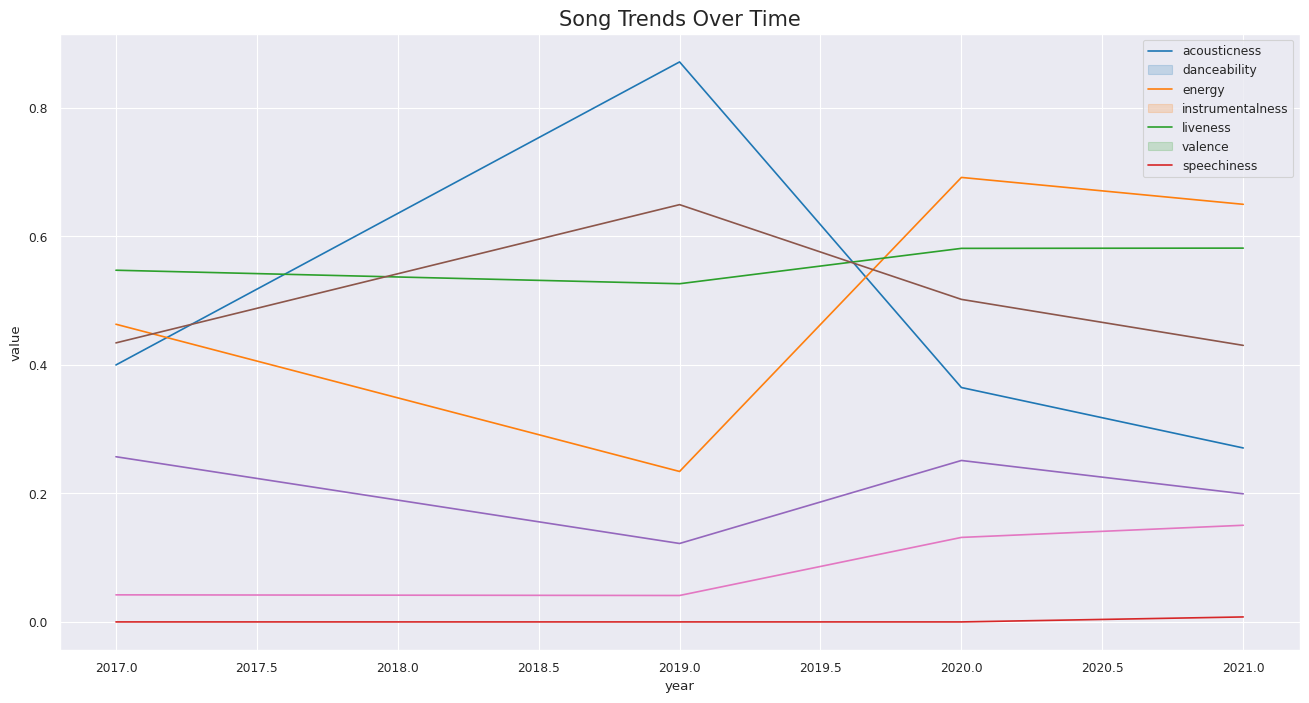

In [175]:
# Create a line plot to see the trends
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=month_pop)
    
    
plt.ylabel("value")
plt.legend(lines,loc = 'upper right');

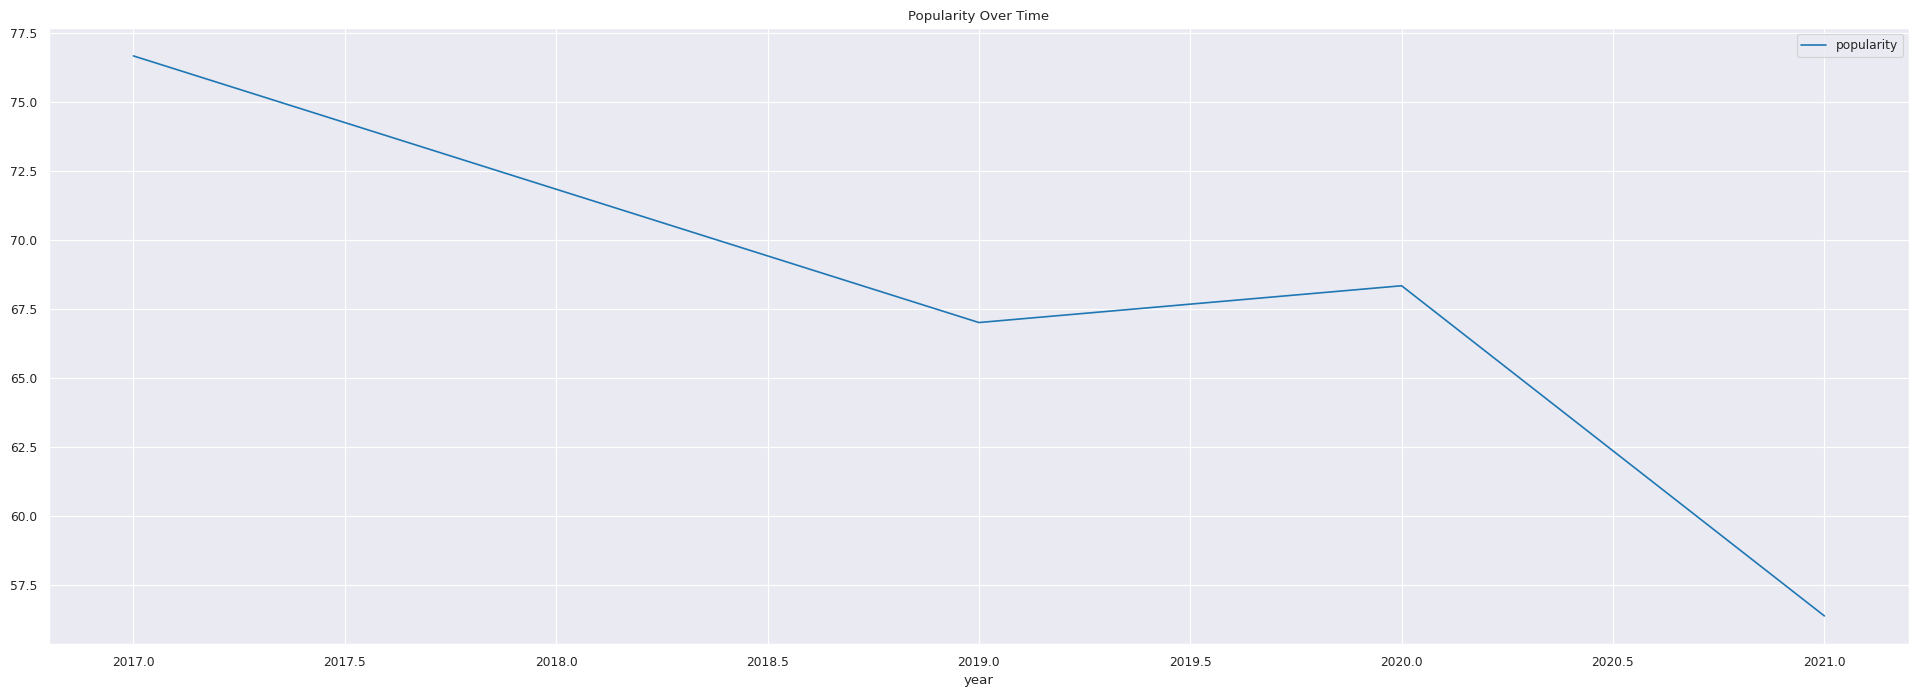

In [176]:
# Popularity trend
df_year = combined_df.groupby(by=["year"]).popularity.mean().reset_index()
pop = df_year.set_index('year')
pop = pd.DataFrame(pop)
pop.plot(title = 'Popularity Over Time');

In [177]:
combined_df['key'].unique()

array([ 8,  0, 11,  6, 10,  9,  5,  7,  1,  2,  3,  4], dtype=int8)

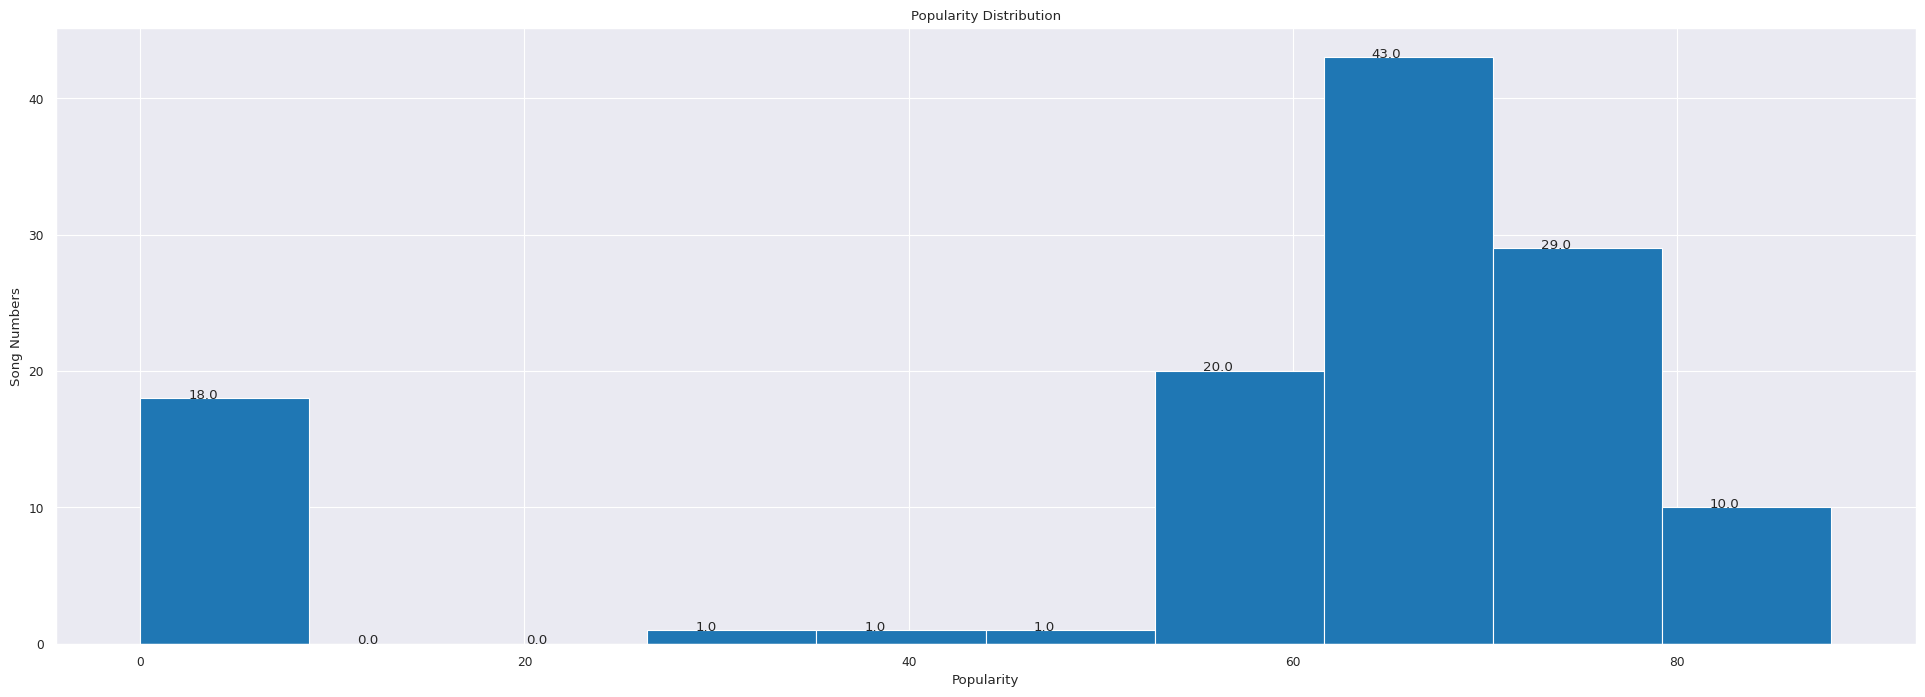

In [178]:
# Visualize histogram - popularity
ax = plt.hist(combined_df['popularity'], bins=10)
for i in range(10):
    plt.text(ax[1][i] + 2.5,ax[0][i],str(ax[0][i]))
plt.xlabel('Popularity')
plt.ylabel('Song Numbers')
plt.title('Popularity Distribution');

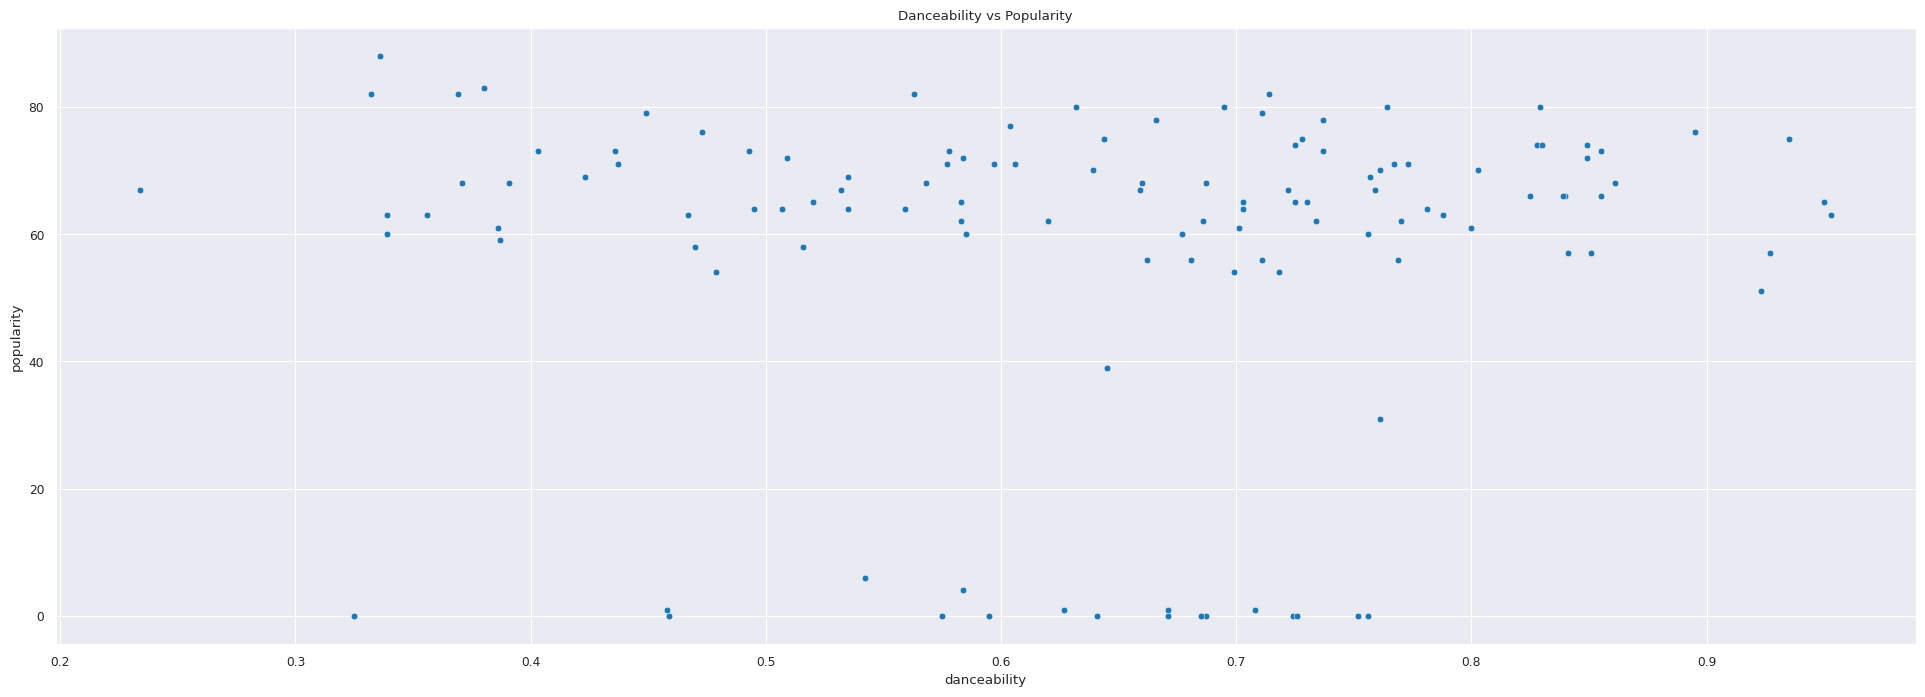

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [179]:
sns.scatterplot(data=combined_df, x='danceability', y='popularity')
plt.title("Danceability vs Popularity")
plt.show()
plt.figure(figsize=(2,2))

In [180]:
combined_df["duration_mins"] = combined_df["duration_ms"]/60000
combined_df.drop(columns="duration_ms", inplace=True)

In [181]:
combined_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,streams,year,duration_mins
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000,123.000000,123.000000,123,1.230000e+02,123.000000,123.000000
mean,57.528455,0.643634,0.580089,5.121951,-6.890407,0.642276,0.145885,0.283182,0.007111,0.202544,0.43549,121.171570,3.926829,2021-05-29 05:27:48.292683008,2.117086e+05,2020.837398,3.579904
min,0.000000,0.234000,0.176000,0.000000,-12.929000,0.000000,0.024800,0.000619,0.000000,0.039800,0.06280,65.987999,1.000000,2017-01-01 00:00:00,1.045000e+03,2017.000000,1.477083
25%,57.500000,0.533500,0.476500,1.000000,-8.296500,0.000000,0.042100,0.042200,0.000000,0.103500,0.26800,92.876503,4.000000,2021-04-16 00:00:00,7.086000e+03,2021.000000,2.887842
50%,65.000000,0.671000,0.598000,6.000000,-6.634000,1.000000,0.094900,0.164000,0.000000,0.131000,0.41600,123.015999,4.000000,2021-07-16 00:00:00,2.152100e+04,2021.000000,3.393100
75%,72.000000,0.758000,0.691500,8.000000,-5.458500,1.000000,0.233500,0.506000,0.000002,0.248000,0.58950,143.520500,4.000000,2021-09-26 00:00:00,9.075750e+04,2021.000000,4.020558
max,88.000000,0.953000,0.899000,11.000000,-3.090000,1.000000,0.564000,0.941000,0.551000,0.847000,0.89100,205.863007,5.000000,2021-12-17 00:00:00,3.210837e+06,2021.000000,9.969167
std,25.004369,0.161324,0.158455,3.625016,2.011443,0.481291,0.122709,0.283532,0.055147,0.162353,0.21953,32.353104,0.427933,NaN,5.982556e+05,0.669891,1.133790


In [149]:
combined_df= combined_df[(combined_df.tempo>=15)&(combined_df.tempo<=150) ]
# combined_df.tempo.dtype

In [182]:
combined_df.drop('date',axis=1,inplace=True)

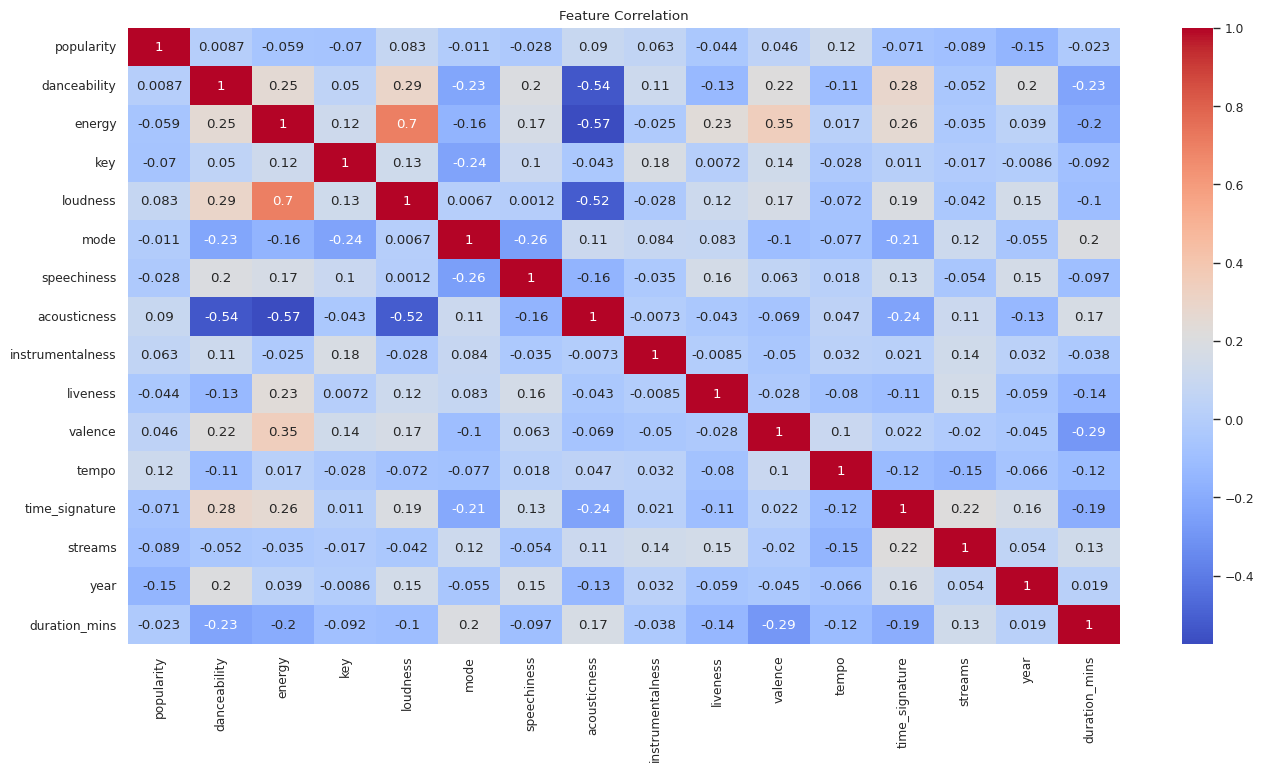

In [183]:
plt.figure(figsize=(16,8))
corr_matrix = combined_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


# Step 4: Feature Engineering
One-hot encode 'key' and 'mode'

In [184]:
columns_to_drop = ['track_id', 'track_name', 'album_name', 'artist_genres']
combined_df = combined_df.drop(columns=columns_to_drop, errors='ignore')

In [185]:
features_to_drop = ['year']
combined_df = combined_df.drop(columns=features_to_drop, errors='ignore')

In [186]:
combined_df['mode'].describe()

count    123.000000
mean       0.642276
std        0.481291
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: mode, dtype: float64

In [187]:
# Step 4: Feature Engineering
# One-hot encode 'key' and 'mode'
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(combined_df[['key', 'mode']]).toarray()
encoded_feature_names = encoder.get_feature_names_out(['key', 'mode'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)



In [188]:
# Combine with the original dataset
combined_df = combined_df.drop(['key', 'mode'], axis=1)
combined_df = pd.concat([combined_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = ['tempo', 'duration_mins', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'streams']
combined_df[numerical_columns] = scaler.fit_transform(combined_df[numerical_columns])


In [189]:

# Step 5: Regression Model for Popularity Prediction
X = combined_df.drop('popularity', axis=1)
y = combined_df['popularity']
X = X.select_dtypes(include='number')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")



Linear Regression MSE: 1060.0217226220248


In [ ]:
# Step 6: Classification Model for Popularity Levels
# Create popularity levels
bins = [0, 25, 50, 75, 100]
labels = [1, 2, 3, 4]
combined_df['popularity_level'] = pd.cut(combined_df['popularity'], bins=bins, labels=labels, include_lowest=True)
combined_df = combined_df.drop('popularity', axis=1)

In [195]:


X = combined_df.drop('popularity_level', axis=1)
y = combined_df['popularity_level']
X = X.select_dtypes(include=[np.number])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [196]:
X_train.dtypes

danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature         int8
streams             float64
duration_mins       float64
key_0               float64
key_1               float64
key_2               float64
key_3               float64
key_4               float64
key_5               float64
key_6               float64
key_7               float64
key_8               float64
key_9               float64
key_10              float64
key_11              float64
mode_0              float64
mode_1              float64
dtype: object

In [197]:
# Step 7: Handle Class Imbalance
smote = SMOTE(random_state=42,k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [209]:

# Step 8: Random Forest with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))




Optimized Random Forest Accuracy: 0.76
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           3       0.78      0.95      0.86        19
           4       1.00      0.25      0.40         4

    accuracy                           0.76        25
   macro avg       0.59      0.40      0.42        25
weighted avg       0.75      0.76      0.72        25



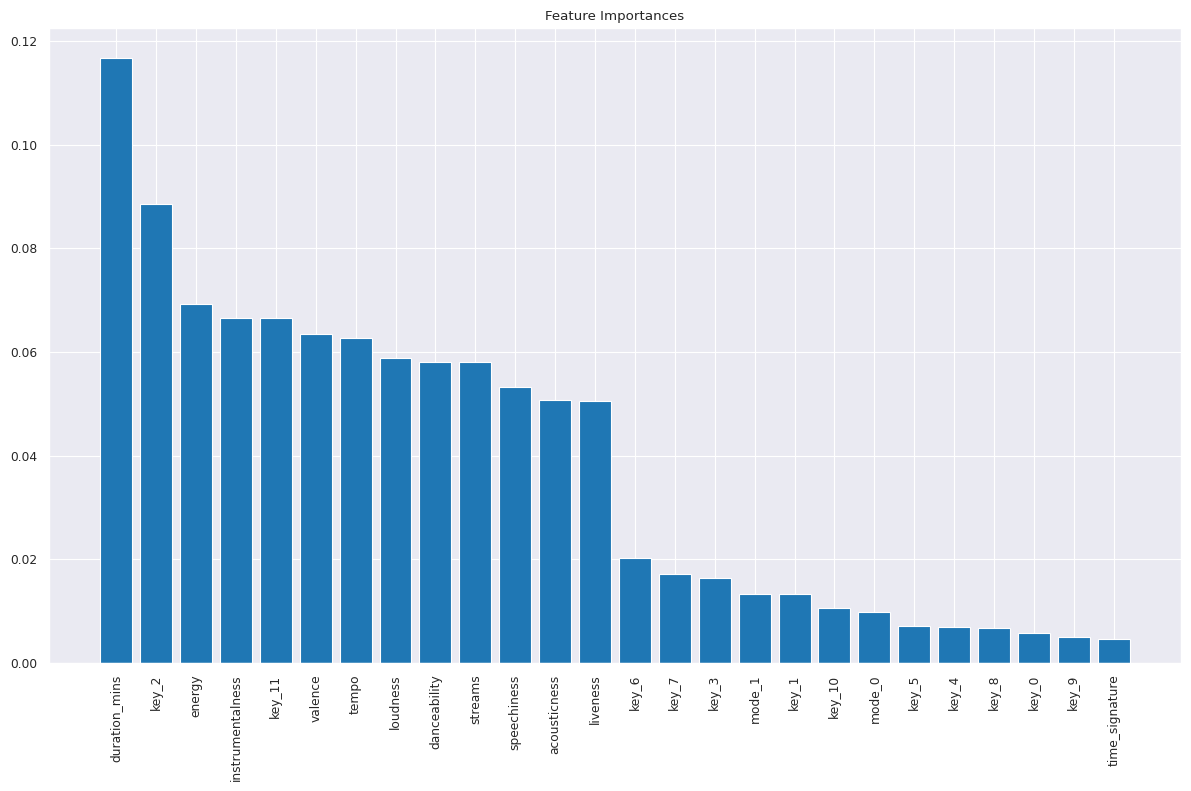

In [210]:
# Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

1. Model Evaluation and Improvement

Cross-validation

In [201]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-validated F1 scores: {scores}")
print(f"Mean F1 score: {scores.mean()}")


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated F1 scores: [0.57647059 0.51212121 0.51212121 0.55592105 0.62519936]
Mean F1 score: 0.5563666854301529


Analyse Misclassification


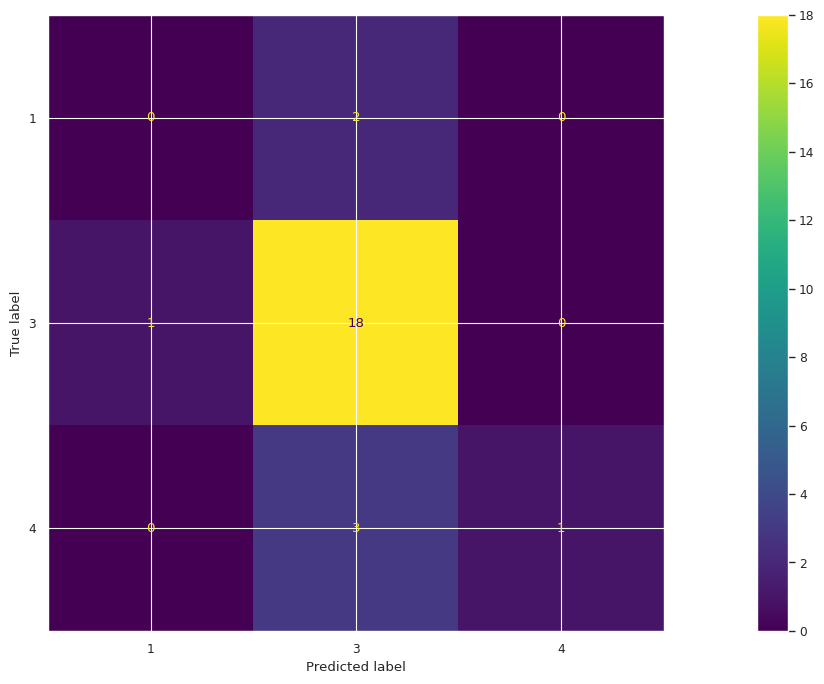

In [202]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.show()


2. Advanced Feature Engineering

Interaction Terms:

In [203]:
combined_df['energy_loudness'] = combined_df['energy'] * combined_df['loudness']


PCA for Dimensionality Reduction

In [204]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


4. Interpretability
SHAP for Feature Impact:


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


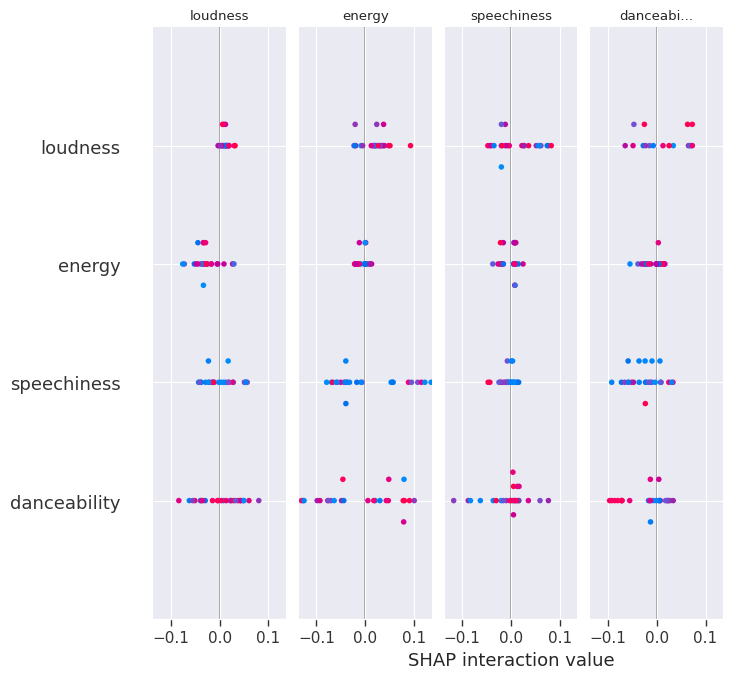

In [205]:
import shap
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


Other Models:
Gradient Boosting 

In [213]:
# Adjust labels for XGBoost compatibility
y_train_resampled = y_train_resampled.astype(int) - 1
y_test_adjusted = y_test.astype(int) - 1

# XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test_adjusted, y_pred_xgb))

# Adjust predictions back to original labels for reporting
y_pred_xgb_adjusted = y_pred_xgb + 1
print(classification_report(y_test, y_pred_xgb_adjusted))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.75      0.63      0.69        19
           3       0.12      0.25      0.17         4

    accuracy                           0.52        25
   macro avg       0.29      0.29      0.28        25
weighted avg       0.59      0.52      0.55        25

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           3       0.75      0.63      0.69        19
           4       0.12      0.25      0.17         4

    accuracy                           0.52        25
   macro avg       0.29      0.29      0.28        25
weighted avg       0.59      0.52      0.55        25



Logistic Regression Model

In [212]:
# Logistic Regression
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred_logistic = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred_logistic, zero_division=1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [214]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(best_rf_model, X, y, cv=skf, scoring='f1_weighted')
print(f"Cross-validated F1 scores: {scores}")
print(f"Mean F1 score: {np.mean(scores)}")


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated F1 scores: [0.6027907  0.55047619 0.55047619 0.58739837 0.56666667]
Mean F1 score: 0.5715616238554413


Export Model

In [206]:
import joblib
joblib.dump(best_rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']